In [22]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols
import iexfinance as iex
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iedfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [24]:
list_of_tickers = ["SPY", 'AGG']
#Compile df for 2 tickers
list_of_tickers = ["SPY", 'AGG']
end_date= datetime.now()
start_date= end_date + timedelta(-365)
tickers_df= get_historical_data(list_of_tickers, start_date, end_date, output_format="pandas", columns='close' )
tickers_df.head()

SPY                                       AGG                  \
              open    high     low   close    volume    open    high     low   
date                                                                           
2018-09-04  289.84  290.21  288.68  289.81  57594367  106.02  106.12  105.98   
2018-09-05  289.41  289.64  287.89  289.03  72452437  106.05  106.08  105.96   
2018-09-06  289.15  289.49  287.00  288.16  65909863  106.09  106.27  106.09   
2018-09-07  286.98  288.70  286.71  287.60  73524824  105.92  105.94  105.81   
2018-09-10  288.74  289.04  287.88  288.10  50210903  105.85  105.95  105.85   

                             
             close   volume  
date                         
2018-09-04  106.06  3164000  
2018-09-05  106.01  2788329  
2018-09-06  106.19  2248481  
2018-09-07  105.81  2571740  
2018-09-10  105.91  3305683

In [25]:
tickers_df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
tickers_df.head()

,SPY,AGG
,close,close
date,,
2018-09-04,289.81,106.06
2018-09-05,289.03,106.01
2018-09-06,288.16,106.19
2018-09-07,287.60,105.81
2018-09-10,288.10,105.91


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 100 iterations and generate at least 20 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 20 years

In [26]:
#calculated daily returns for SPY & AGG
daily_returns = tickers_df.pct_change()
daily_returns.dropna()
daily_returns.head()

,SPY,AGG
,close,close
date,,
2018-09-04,NaN,NaN
2018-09-05,-0.002691,-0.000471
2018-09-06,-0.003010,0.001698
2018-09-07,-0.001943,-0.003578
2018-09-10,0.001739,0.000945


In [27]:
#calculate average daily returns of SPY and AGG
avg_daily_return_spy = daily_returns.mean()['SPY']['close']
avg_daily_return_agg = daily_returns.mean()['AGG']['close']
print("SPY average daily return is", avg_daily_return_spy)
print("AGG average daily return is", avg_daily_return_agg)

SPY average daily return is 6.834490303330254e-05
AGG average daily return is 0.00028488453974385086


In [28]:
# Calculate volatility
std_dev_daily_return_spy = daily_returns.std()['SPY']['close']
std_dev_daily_return_agg = daily_returns.std()['AGG']['close']
print("SPY volatility is", std_dev_daily_return_spy)
print("AGG volatility is", std_dev_daily_return_agg)


SPY volatility is 0.010552203289006582
AGG volatility is 0.001841397672134793


In [29]:
# Save the last day's closing price
# YOUR CODE HERE
spy_last_price = tickers_df['SPY']['close'][-1]
agg_last_price = tickers_df['AGG']['close'][-1]
print(spy_last_price)
print(agg_last_price)

290.74
113.84


In [73]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [74]:
# Run the Monte Carlo Simulation
for n in range(number_simulations):
    
    # YOUR CODE HERE
    #initialize simulation
    simulated_spy_prices = [spy_last_price]
    simulated_agg_prices = [agg_last_price]
    
    # Simulate the returns
    for i in range(number_records):
        # Calculate the simulated price using the last price within the list
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_spy, std_dev_daily_return_spy))
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_return_agg, std_dev_daily_return_agg))
       
        # Append the simulated price to the list
        simulated_spy_prices.append(simulated_spy_price)
        simulated_agg_prices.append(simulated_agg_price)
        
    monte_carlo["SPY prices"] = pd.Series(simulated_spy_prices)
    monte_carlo["AGG prices"] = pd.Series(simulated_agg_prices)
    #print(monte_carlo)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = monte_carlo.pct_change()
   
    # Set the portfolio weights (60% SPY; 40% AGG)
    weight = [0.60, 0.40]
    portfolio_daily_return= simulated_daily_returns.dot(weight)
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_return.fillna(0)).cumprod()
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996744,1.004601,0.995561,0.994493,0.999777,0.989601,1.000461,1.009232,0.999568,1.001995,...,0.999589,0.996083,1.014104,1.006159,1.006523,0.999735,1.009785,1.001472,1.005251,0.992145
2,0.997342,1.003925,1.001684,1.000728,0.996402,1.001837,0.991614,1.007175,0.999617,1.006927,...,0.994174,0.999716,1.007200,1.003998,0.999476,0.995436,1.008091,0.993984,1.015137,0.991678
3,1.007717,1.002317,1.025574,0.996392,0.999816,1.008658,0.994783,1.001667,1.004982,1.018055,...,0.982857,1.007706,1.009574,0.994291,0.997714,0.996962,1.005605,0.994732,1.012641,0.986300
4,1.008785,1.008020,1.023157,0.997568,1.007507,1.018396,0.992011,0.993238,1.006914,1.013850,...,0.990697,1.011637,1.009462,1.002210,0.997452,0.999320,1.011718,0.989565,1.010103,0.982335


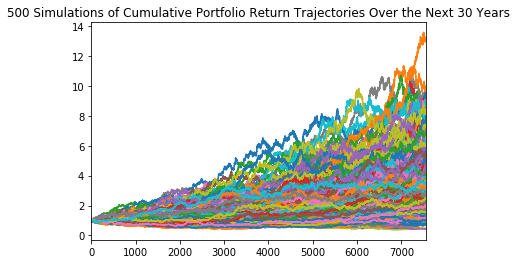

In [90]:
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 30 Years"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [75]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE
ending_cumulative_returns30 = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns30.head()

0    3.769551
1    1.718943
2    8.573021
3    2.480466
4    2.010538
Name: 7560, dtype: float64

In [76]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
ending_cumulative_returns20= portfolio_cumulative_returns.iloc[252*20 - 1, :]
ending_cumulative_returns20.head()

0    2.934984
1    1.453049
2    3.501161
3    1.684156
4    2.788960
Name: 5039, dtype: float64

In [77]:
# Display the 90% confidence interval for the ending 30 year returns
confidence_interval30 = ending_cumulative_returns30.quantile(q=[0.05, 0.95])
confidence_interval30

0.05    1.018682
0.95    7.039690
Name: 7560, dtype: float64

In [78]:
# Display the 90% confidence interval for the ending 20 year returns
confidence_interval20 = ending_cumulative_returns20.quantile(q=[0.05, 0.95])
confidence_interval20

0.05    0.961321
0.95    4.068837
Name: 5039, dtype: float64

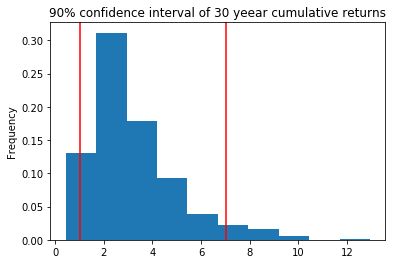

In [79]:
# Visualize the distribution of the ending 30 year returns
plt.figure();
ending_cumulative_returns30.plot(kind='hist', density=True, bins=10, title= "90% confidence interval of 30 yeear cumulative returns")
plt.axvline(confidence_interval30.iloc[0], color='r')
plt.axvline(confidence_interval30.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [80]:
# Display the 10% confidence interval for the ending 30 year returns
confidence_level_10 = ending_cumulative_returns30.quantile(q=[0.1])
confidence_level_10

0.1    1.443047
Name: 7560, dtype: float64

In [81]:
# Display the 50% confidence interval for the ending 30 year returns
confidence_level_50 = ending_cumulative_returns30.quantile(q=[.5])
confidence_level_50

0.5    2.783595
Name: 7560, dtype: float64

In [82]:
# Display the 90% confidence interval for the ending 30 year returns
confidence_level_90 = ending_cumulative_returns30.quantile(q=[.90])
confidence_level_90

0.9    5.590004
Name: 7560, dtype: float64

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [93]:
#initiate initial investment of $20,000
initial_investment= 50000
                                                    
# Print the results
print(f"The 10th percentile is that an initial investment of $50,000 will result in a portfolio value of"
      f" ${(confidence_level_10* initial_investment).iloc[0].round(2)}")

The 10th percentile is that an initial investment of $50,000 will result in a portfolio value of $72152.36


In [94]:
#50th percentile portfolio returns of a 30 year investment

# Print the results
print(f"The 50th percentile is that an initial investment of $50,000 will result in a portfolio value of"
      f" ${(confidence_level_50* initial_investment).iloc[0].round(2)}")

The 50th percentile is that an initial investment of $50,000 will result in a portfolio value of $139179.75


In [95]:
#90th percentile portfolio returns of a 30 year investment

# Print the results
print(f"The 90th percentile is that an initial investment of $50,000 will result in a portfolio value of"
      f" ${(confidence_level_90* initial_investment).iloc[0].round(2)}")

The 90th percentile is that an initial investment of $50,000 will result in a portfolio value of $279500.18


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [96]:
# 4% withdraw of 10th percentile
plaid_proj_income= 7389
retirement_income= (confidence_level_10* initial_investment).iloc[0]* .04
if retirement_income>= plaid_proj_income:
    print(f"it is sufficent")
else:
    print(f"Plaid projected income of" f"${plaid_proj_income}" 
          f" is greater than retirement income of " f"${retirement_income.round(2)}")

Plaid projected income of$7389 is greater than retirement income of $2886.09


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [97]:
# 50% increase in initial investment
retirement_income_increase= (confidence_level_10* (initial_investment* 1.5)).iloc[0]* .04
if retirement_income>= plaid_proj_income:
    print("it is sufficent")
else:
     print(f"Plaid projected income of" f"${plaid_proj_income}" f" is greater than retirement income of " 
           f"${retirement_income_increase.round(2)}")

Plaid projected income of$7389 is greater than retirement income of $4329.14


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE